In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
from plotly.subplots import make_subplots

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#nltk.download("stopwords")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')

from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_jazeera = pd.read_csv("al_jazeera.csv")
df_bbc = pd.read_csv("bbc (1).csv")
df_cnn = pd.read_csv("cnn.csv")
df_reuters = pd.read_csv("reuters.csv")


In [3]:
df_jazeera["label"] = "al_jazeera"
df_bbc["label"] = "bbc"
df_cnn["label"] = "cnn"
df_reuters["label"] = "reuters"

In [4]:
print(f"al_jazeera : {df_jazeera.shape}")
print(f"bbc        : {df_bbc.shape}")
print(f"cnn        : {df_cnn.shape}")
print(f"reuters    : {df_reuters.shape}")

al_jazeera : (1000, 5)
bbc        : (1000, 5)
cnn        : (753, 5)
reuters    : (1000, 5)


In [5]:
print("Total Missing Values\n")
print(f"al_jazeera : {df_jazeera.isnull().sum().sum()}")
print(f"bbc        : {df_bbc.isnull().sum().sum()}")
print(f"cnn        : {df_cnn.isnull().sum().sum()}")
print(f"reuters    : {df_reuters.isnull().sum().sum()}")

Total Missing Values

al_jazeera : 19
bbc        : 0
cnn        : 0
reuters    : 0


In [8]:
df_jazeera

,text,likes,comments,shares,label
0,“Numbers dropped by around half after the eart...,303,15,5,al_jazeera
1,This exclusive footage obtained by Al Jazeera ...,809,174,81,al_jazeera
2,The disappearance of 6-year-old Joshlin Smith ...,236,75,33,al_jazeera
3,Millions are still suffering the pandemic’s li...,87,11,11,al_jazeera
4,Multan Sultans face Peshawar Zalmi in the Paki...,522,71,5,al_jazeera
...,...,...,...,...,...
995,“It is the food of animals.” Umm Muhammad Hamm...,767,128,168,al_jazeera
996,"🔴 ""...The facility recently coped with 78 deli...",302,79,70,al_jazeera
997,Hungary replaces President Katalin Novak with ...,104,19,15,al_jazeera
998,🔴 Doctors at al-Shifa Hospital in Gaza City ar...,321,104,78,al_jazeera


In [9]:
df_bbc

,text,likes,comments,shares,label
0,The way Clubcard prices were displayed made it...,223,185,16,bbc
1,"""They aren't yet mature but penguins do tend t...",682,37,35,bbc
2,The San Francisco 49ers will face the Kansas C...,233,303,28,bbc
3,Hafiz Naeem Ur Rehman said that the vote was r...,510,145,87,bbc
4,Find out which actors took home awards for som...,304,66,26,bbc
...,...,...,...,...,...
748,"""It is unique throughout the world that we can...",1096,345,74,bbc
749,"""Once you hear that constant thudding, you can...",287,116,27,bbc
750,The ardent critic of Vladimir Putin appeared i...,566,271,43,bbc
751,"""Keep challenging yourself even as you get old...",2447,281,156,bbc


In [10]:
df_cnn

,text,likes,comments,shares,label
0,Luggage fees feel like they’ve been around for...,241,342,32,cnn
1,New Year’s Eve 2020 was peculiar for many of us.,158,106,6,cnn
2,Fighting temperatures as low as minus 4 degree...,380,184,73,cnn
3,Jack Nicklaus said players wanted to detonate ...,163,144,22,cnn
4,As the crescent moon makes its appearance Mond...,292,329,39,cnn
...,...,...,...,...,...
748,A rocket carrying a small satellite burst into...,304,141,46,cnn
749,Qatar Foreign Ministry spokesperson Majed Al A...,176,433,48,cnn
750,"""It's not us. It's you"": Miami Beach is trying...",1063,791,67,cnn
751,A single dose of MM120 led to a 48% rate of re...,1017,474,339,cnn


In [11]:
df_reuters

,text,likes,comments,shares,label
0,The U.S. FDA has declined to approve Viatris a...,16,1,1,reuters
1,The Los Angeles Dodgers' fifth starter slot ju...,22,12,1,reuters
2,China will complete a review into years-long t...,44,17,3,reuters
3,LaLiga leaders Real Madrid cruised to a 4-0 ho...,36,4,1,reuters
4,A South Korean citizen arrested in Russia on s...,69,9,7,reuters
...,...,...,...,...,...
748,Portugal's criminal police agency PJ said on S...,49,12,8,reuters
749,Parents and residents have blamed a lack of se...,35,2,14,reuters
750,Palestinians prepared for Ramadan in a somber ...,114,71,14,reuters
751,"US job growth rose by 275,000 in February, but...",28,6,6,reuters


In [6]:
df_jazeera.dropna(inplace=True)
df_jazeeara = df_jazeera.sample(n=753, random_state=42).reset_index(drop=True)
df_bbc = df_bbc.sample(n=753, random_state=42).reset_index(drop=True)
df_cnn = df_cnn.sample(n=753, random_state=42).reset_index(drop=True)
df_reuters = df_reuters.sample(n=753, random_state=42).reset_index(drop=True)

In [7]:
df = pd.concat([df_jazeera, df_bbc, df_cnn, df_reuters], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)
df.head()

,text,likes,comments,shares,label
0,The show was defined by its playfulness and pu...,1418,477,62,cnn
1,"""People have the power to make a difference, w...",257,55,15,bbc
2,Hayao Miyazaki won his second Oscar on Sunday ...,215,4,21,reuters
3,🔴 Several thousand protesters have gathered in...,997,335,139,al_jazeera
4,The US will send a new military aid package fo...,193,85,22,reuters


In [12]:
filtered = df.groupby("label").agg({"likes": "mean",
                                   "comments": "mean",
                                   "shares": "mean"}).reset_index()
filtered

,label,likes,comments,shares
0,al_jazeera,728.180428,200.672783,102.948012
1,bbc,789.223108,243.027888,66.614874
2,cnn,741.370518,423.033201,79.596282
3,reuters,94.107570,25.169987,10.640106


In [13]:
ps = PorterStemmer()

def clean_text(text):
    text = re.sub("[^a-zA-z]", " ", text)     
    text = re.sub(r"\n", " ", text)
    text = re.sub("\s+", " ", text)           
    text = text.lower()
    text = text.split()
    text = [i for i in text if len(text) > 1]
    text = [ps.stem(i) for i in text if not i in set(stopwords.words("english"))]
    text = " ".join(text)
    return text

df["cleaned_text"] = df["text"].apply(clean_text)

In [14]:
df

,text,likes,comments,shares,label,cleaned_text
0,The show was defined by its playfulness and pu...,1418,477,62,cnn,show defin play punctuat moment fun ryan gosl ...
1,"""People have the power to make a difference, w...",257,55,15,bbc,peopl power make differ whether industri
2,Hayao Miyazaki won his second Oscar on Sunday ...,215,4,21,reuters,hayao miyazaki second oscar sunday semi autobi...
3,🔴 Several thousand protesters have gathered in...,997,335,139,al_jazeera,sever thousand protest gather centr london dem...
4,The US will send a new military aid package fo...,193,85,22,reuters,us send new militari aid packag ukrain worth m...
...,...,...,...,...,...,...
3235,Could Emma Stone be about to join an exclusive...,267,129,26,bbc,could emma stone join exclus club
3236,"""I was so mad at the time, I had to try someth...",226,269,25,bbc,mad time tri someth
3237,"""They get recycled – Ed will become whoever’s ...",343,105,31,bbc,get recycl ed becom whoever next underneath ed...
3238,🔴 New Zealand's government has designated the ...,368,258,51,al_jazeera,new zealand govern design entireti hama organi...


In [15]:
df['words'] = df["cleaned_text"].apply(lambda x:re.findall(r'\w+', x))
df["word_counts"] = df["words"].apply(lambda x: len(x))
df['length_counts'] = df["cleaned_text"].apply(len)
df["stopword_counts"] = df["text"].apply(lambda x:  len([i for i in x if i in set(stopwords.words("english"))]))
df["punct_counts"] = df["text"].apply(lambda x: len([i for i in x if i in string.punctuation]))
df["caps_counts"] = df["text"].apply(lambda x: len([i for i in x if i.isupper]))

In [16]:
df

,text,likes,comments,shares,label,cleaned_text,words,word_counts,length_counts,stopword_counts,punct_counts,caps_counts
0,The show was defined by its playfulness and pu...,1418,477,62,cnn,show defin play punctuat moment fun ryan gosl ...,"[show, defin, play, punctuat, moment, fun, rya...",13,79,58,2,143
1,"""People have the power to make a difference, w...",257,55,15,bbc,peopl power make differ whether industri,"[peopl, power, make, differ, whether, industri]",6,40,29,5,89
2,Hayao Miyazaki won his second Oscar on Sunday ...,215,4,21,reuters,hayao miyazaki second oscar sunday semi autobi...,"[hayao, miyazaki, second, oscar, sunday, semi,...",19,122,78,3,184
3,🔴 Several thousand protesters have gathered in...,997,335,139,al_jazeera,sever thousand protest gather centr london dem...,"[sever, thousand, protest, gather, centr, lond...",21,126,65,6,188
4,The US will send a new military aid package fo...,193,85,22,reuters,us send new militari aid packag ukrain worth m...,"[us, send, new, militari, aid, packag, ukrain,...",29,177,94,9,250
...,...,...,...,...,...,...,...,...,...,...,...,...
3235,Could Emma Stone be about to join an exclusive...,267,129,26,bbc,could emma stone join exclus club,"[could, emma, stone, join, exclus, club]",6,33,17,1,52
3236,"""I was so mad at the time, I had to try someth...",226,269,25,bbc,mad time tri someth,"[mad, time, tri, someth]",4,19,24,4,51
3237,"""They get recycled – Ed will become whoever’s ...",343,105,31,bbc,get recycl ed becom whoever next underneath ed...,"[get, recycl, ed, becom, whoever, next, undern...",10,57,22,4,93
3238,🔴 New Zealand's government has designated the ...,368,258,51,al_jazeera,new zealand govern design entireti hama organi...,"[new, zealand, govern, design, entireti, hama,...",16,114,68,3,175


In [17]:
grouped_istatistic = df.groupby("label").agg({"word_counts": "mean",
                                             "length_counts": "mean",
                                             "stopword_counts": "mean",
                                             "punct_counts": "mean",
                                             "caps_counts": "mean"})

grouped_istatistic

,word_counts,length_counts,stopword_counts,punct_counts,caps_counts
label,,,,,
al_jazeera,18.268094,112.051988,63.135576,4.268094,170.027523
bbc,7.826029,47.204515,28.620186,3.126162,80.448871
cnn,18.037185,113.557769,65.868526,3.483400,178.783533
reuters,22.693227,144.219124,80.413015,5.216467,214.309429


In [18]:
al_jazeera_text = " ".join(df.query("label == 'al_jazeera'")["cleaned_text"])
bbc_text = " ".join(df.query("label == 'bbc'")["cleaned_text"])
cnn_text = " ".join(df.query("label == 'cnn'")["cleaned_text"])
reuters_text = " ".join(df.query("label == 'reuters'")["cleaned_text"])

In [19]:
sia = SentimentIntensityAnalyzer()


In [20]:
df["compound"] = df["cleaned_text"].apply(lambda x: sia.polarity_scores(x)["compound"])

df["senti_scores"] = ""
df.loc[(df.compound > 0.05), "senti_scores"] = "pozitive"
df.loc[(df.compound >= -0.05) & (df.compound <= 0.05), "senti_scores"] = "neutral"
df.loc[(df.compound < -0.05), "senti_scores"] = "negative"

In [21]:
df.head()


,text,likes,comments,shares,label,cleaned_text,words,word_counts,length_counts,stopword_counts,punct_counts,caps_counts,compound,senti_scores
0,The show was defined by its playfulness and pu...,1418,477,62,cnn,show defin play punctuat moment fun ryan gosl ...,"[show, defin, play, punctuat, moment, fun, rya...",13,79,58,2,143,0.7650,pozitive
1,"""People have the power to make a difference, w...",257,55,15,bbc,peopl power make differ whether industri,"[peopl, power, make, differ, whether, industri]",6,40,29,5,89,0.0000,neutral
2,Hayao Miyazaki won his second Oscar on Sunday ...,215,4,21,reuters,hayao miyazaki second oscar sunday semi autobi...,"[hayao, miyazaki, second, oscar, sunday, semi,...",19,122,78,3,184,-0.6369,negative
3,🔴 Several thousand protesters have gathered in...,997,335,139,al_jazeera,sever thousand protest gather centr london dem...,"[sever, thousand, protest, gather, centr, lond...",21,126,65,6,188,-0.7506,negative
4,The US will send a new military aid package fo...,193,85,22,reuters,us send new militari aid packag ukrain worth m...,"[us, send, new, militari, aid, packag, ukrain,...",29,177,94,9,250,-0.2500,negative


In [22]:
grouped_senti_counts = df.groupby(["label", "senti_scores"]).size().reset_index(name="counts")
grouped_senti_counts

,label,senti_scores,counts
0,al_jazeera,negative,575
1,al_jazeera,neutral,216
2,al_jazeera,pozitive,190
3,bbc,negative,220
4,bbc,neutral,349
5,bbc,pozitive,184
6,cnn,negative,287
7,cnn,neutral,230
8,cnn,pozitive,236
9,reuters,negative,296


In [23]:
negative_news = grouped_senti_counts.query("senti_scores == 'negative'")
negative_news

,label,senti_scores,counts
0,al_jazeera,negative,575
3,bbc,negative,220
6,cnn,negative,287
9,reuters,negative,296


In [24]:
neutral_news = grouped_senti_counts.query("senti_scores == 'neutral'")
neutral_news

,label,senti_scores,counts
1,al_jazeera,neutral,216
4,bbc,neutral,349
7,cnn,neutral,230
10,reuters,neutral,185


In [25]:
pozitive_news = grouped_senti_counts.query("senti_scores == 'pozitive'")
pozitive_news

,label,senti_scores,counts
2,al_jazeera,pozitive,190
5,bbc,pozitive,184
8,cnn,pozitive,236
11,reuters,pozitive,272


In [26]:
total_senti_scores = grouped_senti_counts.groupby("senti_scores")["counts"].sum().reset_index()
total_senti_scores

,senti_scores,counts
0,negative,1378
1,neutral,980
2,pozitive,882


In [27]:
""" The fact that they are all negative is due to the fact that
    the majority of the total number of emotions are negative headlines. """

grouped_sentiment = df.groupby("label").agg({"compound": "sum"}).reset_index()
grouped_sentiment

,label,compound
0,al_jazeera,-249.0058
1,bbc,-25.3000
2,cnn,-41.7859
3,reuters,-10.3040


In [28]:
word_vect = TfidfVectorizer(max_features=5000, strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
word_trans = word_vect.fit_transform(df["cleaned_text"]).toarray()
vect_df = pd.DataFrame(word_trans, columns=word_vect.get_feature_names_out())

In [29]:
vect_df

,aaron,aaron ramsdal,abandon,abdallah,abduct,abdul,abdul shokoor,abdul shokoor ezedi,abl,aboard,...,youtu,yulia,yulia navalnaya,zardari,zealand,zone,zone interest,zoo,zqwn,ztvr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.259923,0.0,0.0,0.0,0.0,0.0


In [31]:
df

,text,likes,comments,shares,label,cleaned_text,words,word_counts,length_counts,stopword_counts,punct_counts,caps_counts,compound,senti_scores
0,The show was defined by its playfulness and pu...,1418,477,62,cnn,show defin play punctuat moment fun ryan gosl ...,"[show, defin, play, punctuat, moment, fun, rya...",13,79,58,2,143,0.7650,pozitive
1,"""People have the power to make a difference, w...",257,55,15,bbc,peopl power make differ whether industri,"[peopl, power, make, differ, whether, industri]",6,40,29,5,89,0.0000,neutral
2,Hayao Miyazaki won his second Oscar on Sunday ...,215,4,21,reuters,hayao miyazaki second oscar sunday semi autobi...,"[hayao, miyazaki, second, oscar, sunday, semi,...",19,122,78,3,184,-0.6369,negative
3,🔴 Several thousand protesters have gathered in...,997,335,139,al_jazeera,sever thousand protest gather centr london dem...,"[sever, thousand, protest, gather, centr, lond...",21,126,65,6,188,-0.7506,negative
4,The US will send a new military aid package fo...,193,85,22,reuters,us send new militari aid packag ukrain worth m...,"[us, send, new, militari, aid, packag, ukrain,...",29,177,94,9,250,-0.2500,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,Could Emma Stone be about to join an exclusive...,267,129,26,bbc,could emma stone join exclus club,"[could, emma, stone, join, exclus, club]",6,33,17,1,52,0.2960,pozitive
3236,"""I was so mad at the time, I had to try someth...",226,269,25,bbc,mad time tri someth,"[mad, time, tri, someth]",4,19,24,4,51,-0.4939,negative
3237,"""They get recycled – Ed will become whoever’s ...",343,105,31,bbc,get recycl ed becom whoever next underneath ed...,"[get, recycl, ed, becom, whoever, next, undern...",10,57,22,4,93,0.0000,neutral
3238,🔴 New Zealand's government has designated the ...,368,258,51,al_jazeera,new zealand govern design entireti hama organi...,"[new, zealand, govern, design, entireti, hama,...",16,114,68,3,175,-0.6908,negative


In [30]:
label_df = pd.get_dummies(df["label"])
label_df.head()

,al_jazeera,bbc,cnn,reuters
0,False,False,True,False
1,False,True,False,False
2,False,False,False,True
3,True,False,False,False
4,False,False,False,True


In [32]:
data = df[['likes', 'comments', 'shares', 'word_counts', 'length_counts',
           'stopword_counts', 'punct_counts', 'caps_counts', 'compound']]

In [33]:
data

,likes,comments,shares,word_counts,length_counts,stopword_counts,punct_counts,caps_counts,compound
0,1418,477,62,13,79,58,2,143,0.7650
1,257,55,15,6,40,29,5,89,0.0000
2,215,4,21,19,122,78,3,184,-0.6369
3,997,335,139,21,126,65,6,188,-0.7506
4,193,85,22,29,177,94,9,250,-0.2500
...,...,...,...,...,...,...,...,...,...
3235,267,129,26,6,33,17,1,52,0.2960
3236,226,269,25,4,19,24,4,51,-0.4939
3237,343,105,31,10,57,22,4,93,0.0000
3238,368,258,51,16,114,68,3,175,-0.6908


In [34]:
data = pd.concat([label_df, data], axis=1)
data.head()

,al_jazeera,bbc,cnn,reuters,likes,comments,shares,word_counts,length_counts,stopword_counts,punct_counts,caps_counts,compound
0,False,False,True,False,1418,477,62,13,79,58,2,143,0.7650
1,False,True,False,False,257,55,15,6,40,29,5,89,0.0000
2,False,False,False,True,215,4,21,19,122,78,3,184,-0.6369
3,True,False,False,False,997,335,139,21,126,65,6,188,-0.7506
4,False,False,False,True,193,85,22,29,177,94,9,250,-0.2500


In [35]:
data = data.rename(columns={'bbc': 'bbc_', 'cnn': 'cnn_', 'reuters': 'reuters_', 'likes': 'likes_',
                            'comments': 'comments_', 'shares': 'shares_', 'compound': 'compound_'})

In [36]:
data = pd.concat([data, vect_df], axis=1)
data.head(3)

,al_jazeera,bbc_,cnn_,reuters_,likes_,comments_,shares_,word_counts,length_counts,stopword_counts,...,youtu,yulia,yulia navalnaya,zardari,zealand,zone,zone interest,zoo,zqwn,ztvr
0,False,False,True,False,1418,477,62,13,79,58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,False,True,False,False,257,55,15,6,40,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,False,False,False,True,215,4,21,19,122,78,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
scaler = StandardScaler()


In [38]:
y = data.iloc[:, 0:4]
X = data.iloc[:, 4:]

In [39]:
X

,likes_,comments_,shares_,word_counts,length_counts,stopword_counts,punct_counts,caps_counts,compound_,aaron,...,youtu,yulia,yulia navalnaya,zardari,zealand,zone,zone interest,zoo,zqwn,ztvr
0,1418,477,62,13,79,58,2,143,0.7650,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,257,55,15,6,40,29,5,89,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,215,4,21,19,122,78,3,184,-0.6369,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,997,335,139,21,126,65,6,188,-0.7506,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,193,85,22,29,177,94,9,250,-0.2500,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,267,129,26,6,33,17,1,52,0.2960,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3236,226,269,25,4,19,24,4,51,-0.4939,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3237,343,105,31,10,57,22,4,93,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3238,368,258,51,16,114,68,3,175,-0.6908,0.0,...,0.0,0.0,0.0,0.0,0.259923,0.0,0.0,0.0,0.0,0.0


In [40]:
y

,al_jazeera,bbc_,cnn_,reuters_
0,False,False,True,False
1,False,True,False,False
2,False,False,False,True
3,True,False,False,False
4,False,False,False,True
...,...,...,...,...
3235,False,True,False,False
3236,False,True,False,False
3237,False,True,False,False
3238,True,False,False,False


In [41]:
X.iloc[:, 0:8] = scaler.fit_transform(X.iloc[:, 0:8])


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify= y, random_state=42)

In [43]:
X_train.shape

(2268, 5009)

In [44]:
X_test.shape

(972, 5009)

In [45]:
y_train.shape

(2268, 4)

In [46]:
y_test.shape

(972, 4)

In [47]:
model_list = [LinearSVC(), LogisticRegression(), GradientBoostingClassifier(),
              AdaBoostClassifier(), HistGradientBoostingClassifier()]

roc_auc_list = []
accuracy_list = []

for model in model_list: 
    multi_class = MultiOutputClassifier(model, n_jobs=-1)
    for i in data.iloc[:,0:4].columns:
        multi_class.fit(X_train, y_train[[i]])
        y_pred = multi_class.predict(X_test)
        roc_auc = roc_auc_score(y_test[i], y_pred)
        accuracy = accuracy_score(y_test[[i]], y_pred)
        
        roc_auc_list.append(roc_auc)
        accuracy_list.append(accuracy)

In [48]:
accuracy_df = pd.DataFrame(accuracy_list, columns=["value"])
roc_auc_df = pd.DataFrame(roc_auc_list, columns=["value"])

In [49]:
list_models = ["LinearSVC", "LogisticRegression", "GradientBoostingClassifier",
               "AdaBoostClassifier", "HistGradientBoostingClassifier"]


In [50]:
accuracy_averages = [accuracy_df.value[:4].mean(), accuracy_df.value[4:8].mean(), accuracy_df.value[8:12].mean(),
                    accuracy_df.value[12:16].mean(), accuracy_df.value[16:200].mean()]

roc_auc_averages = [roc_auc_df.value[:4].mean(), roc_auc_df.value[4:8].mean(), roc_auc_df.value[8:12].mean(),
                    roc_auc_df.value[12:16].mean(), roc_auc_df.value[16:20].mean()]

avarage_df = pd.DataFrame(accuracy_averages, columns=["accuracy_mean"], index=list_models)
avarage_df["roc_auc_mean"] = roc_auc_averages

avarage_df

,accuracy_mean,roc_auc_mean
LinearSVC,0.904835,0.854446
LogisticRegression,0.895319,0.822187
GradientBoostingClassifier,0.927212,0.884226
AdaBoostClassifier,0.923868,0.893918
HistGradientBoostingClassifier,0.935700,0.905685


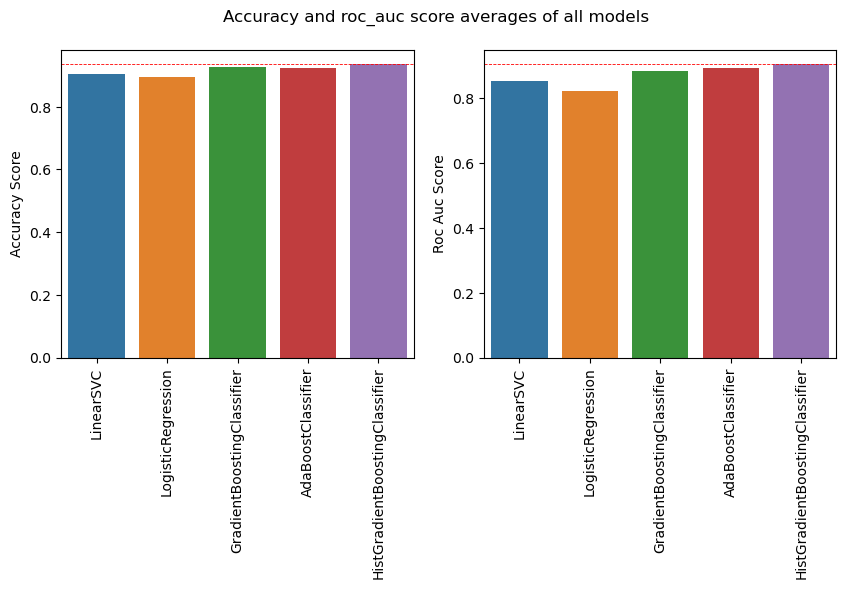

In [51]:
#clrs = ["#bc8f8f", "#cd5c5c", "#cd661d", "#8968cd", "#008080"]
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x=avarage_df.index, y=avarage_df.accuracy_mean)
plt.ylabel("Accuracy Score")
plt.axhline(0.936, ls="--", lw=0.6, color="r")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x=avarage_df.index, y=avarage_df.roc_auc_mean)
plt.ylabel("Roc Auc Score")
plt.axhline(0.906, ls="--", lw=0.6, color="r")
plt.xticks(rotation=90)

plt.suptitle("Accuracy and roc_auc score averages of all models")
plt.show()

In [52]:
final_model = MultiOutputClassifier(HistGradientBoostingClassifier(), n_jobs=-1)
print("LinearSVC SELECTED MODEL\n")

for i in data.iloc[:, 0:4].columns:
    final_model.fit(X_train, y_train[[i]])
    y_pred = final_model.predict(X_test)
    roc_auc = roc_auc_score(y_test[[i]], y_pred)
    accuracy = accuracy_score(y_test[[i]], y_pred)    
            
    print(f'Category name: {i}')
    print(f'{i} AUC ROC score is: {roc_auc:.3f}')
    print(f"accuracy score is: {accuracy:.3f}")
    print("\n", "-" * 50)

LinearSVC SELECTED MODEL

Category name: al_jazeera
al_jazeera AUC ROC score is: 0.913
accuracy score is: 0.935

 --------------------------------------------------
Category name: bbc_
bbc_ AUC ROC score is: 0.884
accuracy score is: 0.921

 --------------------------------------------------
Category name: cnn_
cnn_ AUC ROC score is: 0.882
accuracy score is: 0.918

 --------------------------------------------------
Category name: reuters_
reuters_ AUC ROC score is: 0.944
accuracy score is: 0.969

 --------------------------------------------------
